In [1]:
# Importando as bibliotecas
import pandas as pd;
import numpy as np;
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt;
import plotly.express as px;

In [18]:
# Ajustando o tamanho e estilo dos gráficos
plt.style.use('seaborn-white')
#plt.rcParams['figure.figsize'] = (5,4)

In [3]:
# Lendo o Dataset
df_autismo_criancas = pd.read_csv('Autism-Child-Data.csv')

In [4]:
# Renomeando as colunas
df_autismo_criancas.columns = ["AQ01", "AQ02", "AQ03", "AQ04", "AQ05","AQ06","AQ07","AQ08","AQ09","AQ10", "age","gender", "ethnicity", "jundice", "austim", "contry_of_res", "used_app_before", "result numeric", "age_desc", "relation", "Class/ASD"]

In [5]:
# Visualizando as 10 primeiras linhas do dataset
df_autismo_criancas.head(10)

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
2,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
3,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES
4,0,0,1,0,1,1,0,1,0,1,...,m,?,no,yes,Egypt,no,5,'4-11 years',?,NO
5,1,0,1,1,1,1,0,1,0,1,...,m,White-European,no,no,'United Kingdom',no,7,'4-11 years',Parent,YES
6,1,1,1,1,1,1,1,1,0,0,...,f,'Middle Eastern ',no,no,Bahrain,no,8,'4-11 years',Parent,YES
7,1,1,1,1,1,1,1,0,0,0,...,f,'Middle Eastern ',no,no,Bahrain,no,7,'4-11 years',Parent,YES
8,0,0,1,1,1,0,1,1,0,0,...,f,?,no,yes,Austria,no,5,'4-11 years',?,NO
9,1,0,0,0,1,1,1,1,1,1,...,m,White-European,yes,no,'United Kingdom',no,7,'4-11 years',Self,YES


In [6]:
# Substituuindo valores com '?' por Nan para posteriormente eliminá-los.
df_autismo_criancas = df_autismo_criancas.replace('?', np.nan)

In [7]:
# Visualizando a quantidade de instâncias e atributos contidas no Dataframe
df_autismo_criancas.shape

(291, 21)

In [8]:
# Visualizando as informações gerais do Dataframe
df_autismo_criancas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AQ01             291 non-null    int64 
 1   AQ02             291 non-null    int64 
 2   AQ03             291 non-null    int64 
 3   AQ04             291 non-null    int64 
 4   AQ05             291 non-null    int64 
 5   AQ06             291 non-null    int64 
 6   AQ07             291 non-null    int64 
 7   AQ08             291 non-null    int64 
 8   AQ09             291 non-null    int64 
 9   AQ10             291 non-null    int64 
 10  age              287 non-null    object
 11  gender           291 non-null    object
 12  ethnicity        248 non-null    object
 13  jundice          291 non-null    object
 14  austim           291 non-null    object
 15  contry_of_res    291 non-null    object
 16  used_app_before  291 non-null    object
 17  result numeric   291 non-null    in

In [9]:
# Visualizando a quantidade total de dados nulos no Dataset
df_autismo_criancas.isnull().sum()

AQ01                0
AQ02                0
AQ03                0
AQ04                0
AQ05                0
AQ06                0
AQ07                0
AQ08                0
AQ09                0
AQ10                0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

In [10]:
# Visualizando a porcentagem total de dados nulos no Dataset
df_autismo_criancas.isnull().sum()/df_autismo_criancas.shape[0]*100

AQ01                0.000000
AQ02                0.000000
AQ03                0.000000
AQ04                0.000000
AQ05                0.000000
AQ06                0.000000
AQ07                0.000000
AQ08                0.000000
AQ09                0.000000
AQ10                0.000000
age                 1.374570
gender              0.000000
ethnicity          14.776632
jundice             0.000000
austim              0.000000
contry_of_res       0.000000
used_app_before     0.000000
result numeric      0.000000
age_desc            0.000000
relation           14.776632
Class/ASD           0.000000
dtype: float64

In [11]:
# Elimando as colunas com maior incidência de dados dados nulos, pois assim permacemos com o mesmo números de entrada de dados.
df_autismo_criancas = df_autismo_criancas.drop(columns=['ethnicity', 'relation'], inplace = False, axis = 1)

In [12]:
# Eliminar apenas algumas linhas com dados nulos
df_autismo_criancas = df_autismo_criancas.dropna(inplace = False, axis = 0)

In [13]:
# Confirmando o número de instância da pesquisa após a remoção dos dados ausentes
df_autismo_criancas.shape

(287, 19)

In [14]:
# Visualizando novamente se ainda existe dados nulos no Dataset. 
df_autismo_criancas.isnull().sum()

AQ01               0
AQ02               0
AQ03               0
AQ04               0
AQ05               0
AQ06               0
AQ07               0
AQ08               0
AQ09               0
AQ10               0
age                0
gender             0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result numeric     0
age_desc           0
Class/ASD          0
dtype: int64

In [15]:
# Visualizando um panorama das idades dos participantes da pesquisa
df_autismo_criancas['age'].value_counts()

4     92
5     45
6     38
7     27
11    26
8     21
9     20
10    18
Name: age, dtype: int64

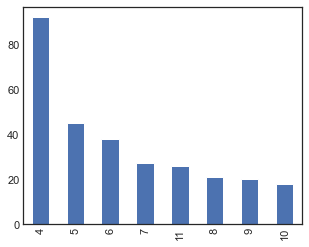

In [16]:
# Visualizando a distribuição de frequência das idades dos participantes da pesquisa
df_autismo_criancas['age'].value_counts().plot.bar();

In [49]:
df_autismo_criancas['austim'].value_counts()

no     238
yes     49
Name: austim, dtype: int64

In [51]:
df_autismo_criancas['austim'].value_counts()/df_autismo_criancas.shape[0]*100

no     82.926829
yes    17.073171
Name: austim, dtype: float64

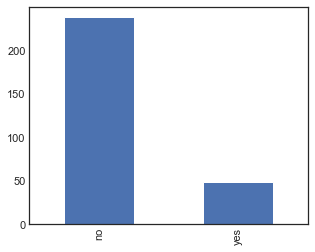

In [50]:
df_autismo_criancas['austim'].value_counts().plot.bar();

In [104]:
# Criando um dataset apenas com o grupo das crianças com TEA
criancas_TEA = df_autismo_criancas.loc[df_autismo_criancas['austim'] == 'yes']

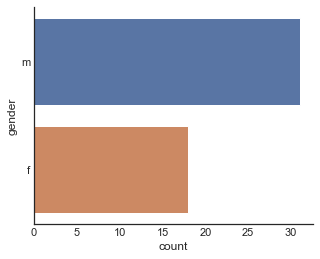

In [107]:
sns.countplot(data = criancas_TEA, y='gender')
sns.despine()

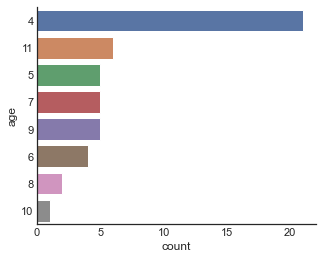

In [108]:
sns.countplot(data= criancas_TEA, y= 'age', order = criancas_TEA["age"].value_counts().index)
sns.despine()

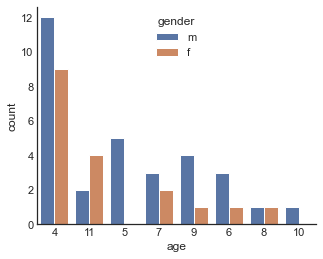

In [111]:
sns.countplot(data= criancas_TEA, x= 'age', hue = 'gender', order = criancas_TEA["age"].value_counts().index.)
sns.despine()